# **Task-01**
#**Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or genders in a population.**
#**Harshit Jaiswal**

# **Importing all the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# **Importing the file**
**Displaying first 5 df.**

In [15]:
df = pd.read_csv('/content/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# **Data Cleaning and Feature Engineering**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [17]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [18]:
df.duplicated().sum()
df.isna().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


In [19]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

**Removing Duplicates**

In [44]:
df.drop_duplicates(inplace=True)

****

**Calculate the Mean and Fill Missing Values for 'Age', 'Height', 'Weight'**

In [24]:
age_mean = np.round(np.mean(df.Age),2)
df["Age"] = df["Age"].fillna(age_mean)
height_mean = np.round(np.mean(df.Height),2)
df["Height"] = df["Height"].fillna(height_mean)
weight_mean = np.round(np.mean(df.Weight),2)
df["Weight"] = df["Weight"].fillna(weight_mean)
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.00,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,A Lamusi,M,23.0,170.00,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,Gunnar Nielsen Aaby,M,24.0,175.34,70.7,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,Edgar Lindenau Aabye,M,34.0,175.34,70.7,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.00,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal


In [25]:
df["Medal"] = df["Medal"].fillna("No Medal")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     271116 non-null  float64
 3   Height  271116 non-null  float64
 4   Weight  271116 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Year    271116 non-null  int64  
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   271116 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


# **Plotting Graphs**

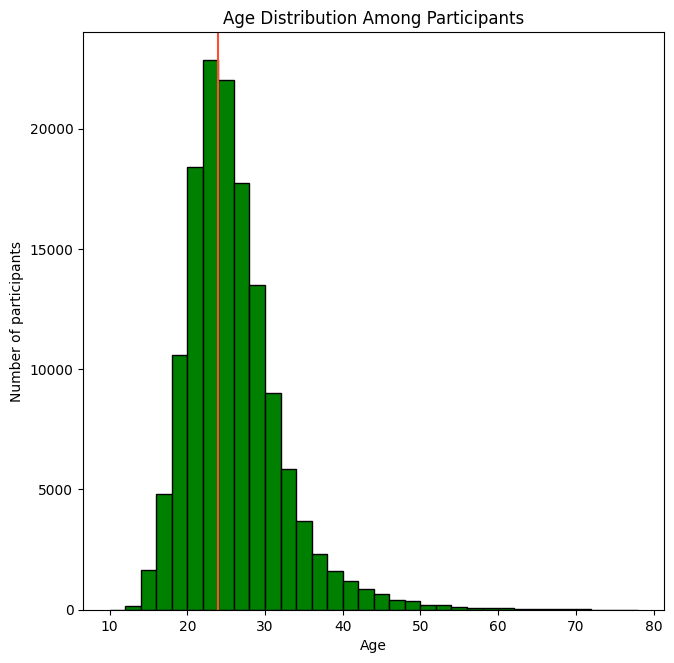

In [49]:
plt.figure(figsize=(7.5,7.5))
plt.title('Age Distribution Among Participants')
plt.xlabel('Age')
plt.ylabel('Number of participants')
plt.hist(df.Age, bins=np.arange(10,80,2), color='green', edgecolor='black')
median_agevalue = df['Age'].median()
plt.axvline(median_agevalue, color='#fc4f30', label='Age Median')
plt.show();

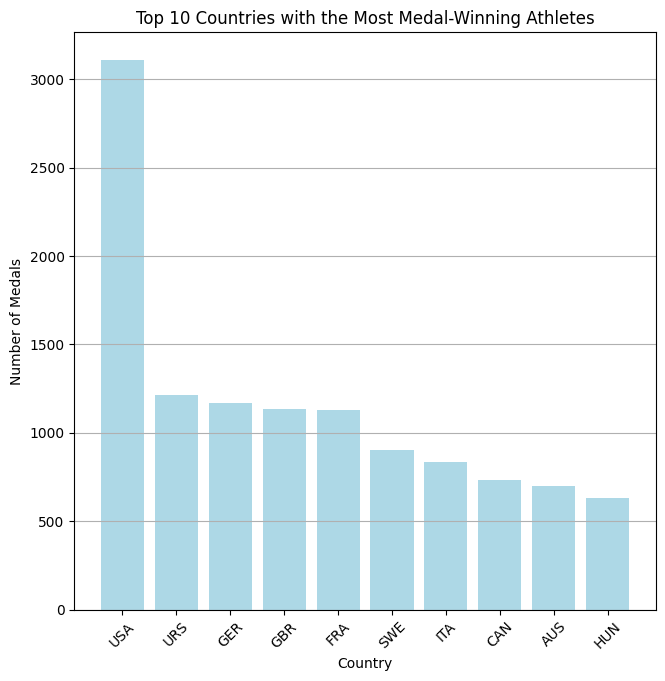

<Figure size 750x750 with 0 Axes>

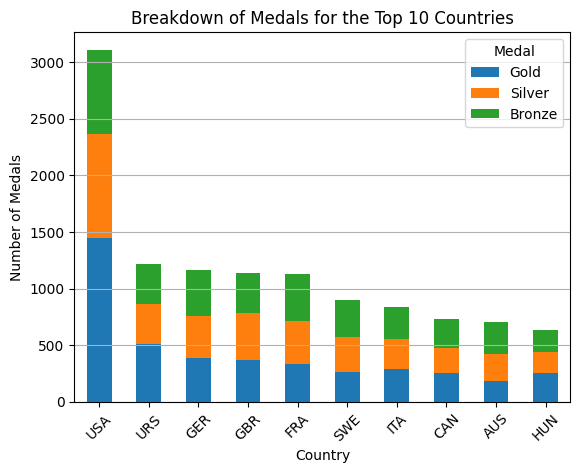

In [59]:
# Group by NOC and Medal to count the number of medals won by each country
medal_counts_by_country = df[df['Medal'].isin(['Gold', 'Silver', 'Bronze'])].groupby(['NOC', 'Medal'])['ID'].count().unstack()

# Calculate total medals for each country
medal_counts_by_country['Total Medals'] = medal_counts_by_country.sum(axis=1)

# Sort by total medals and select the top 10 countries
top_countries = medal_counts_by_country.nlargest(10, 'Total Medals')

# Plot the first bar chart: Total number of medals won by each country
plt.figure(figsize=(7.5, 7.5))
plt.bar(top_countries.index, top_countries['Total Medals'], color='lightblue')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.title('Top 10 Countries with the Most Medal-Winning Athletes')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

# Plot the second bar chart: Breakdown of medals (gold, silver, bronze) for the top 10 countries
plt.figure(figsize=(7.5, 7.5))
top_countries[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True)
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.title('Breakdown of Medals for the Top 10 Countries')
plt.legend(title='Medal')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

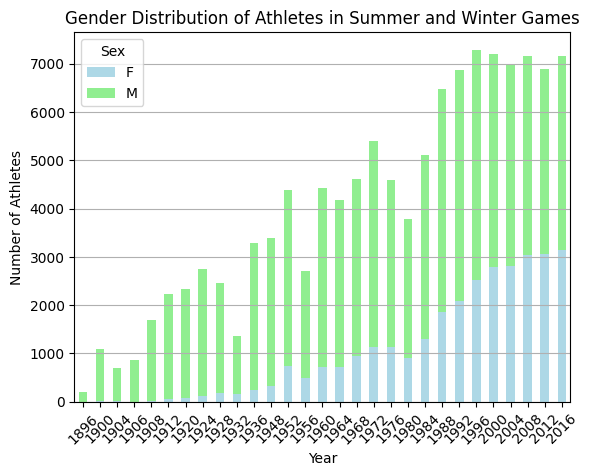

In [56]:
# Filtering df for Summer and Winter Games separatly

if 'Season' in df.columns:
    summer_df = df[df['Season'] == 'Summer']
    winter_df = df[df['Season'] == 'Winter']
else:
    print("Column 'Season' not found in the dfFrame. Please check your df.")

if 'Season' in df.columns:
    summer_gender_count = summer_df.groupby(['Year', 'Sex'])['ID'].count().unstack()
    winter_gender_count = winter_df.groupby(['Year', 'Sex'])['ID'].count().unstack()

    # Plot the gender distribution for Summer and Winter Games
    plt.figure(figsize=(10, 6))
    summer_gender_count.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'])
    plt.xlabel('Year')
    plt.ylabel('Number of Athletes')
    plt.title('Gender Distribution of Athletes in Summer and Winter Games')
    plt.legend(title='Sex', loc='upper left')
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'Season' not found in the df. Please check your df.")
    # Handle the missing column, e.g., load the correct df or create the column


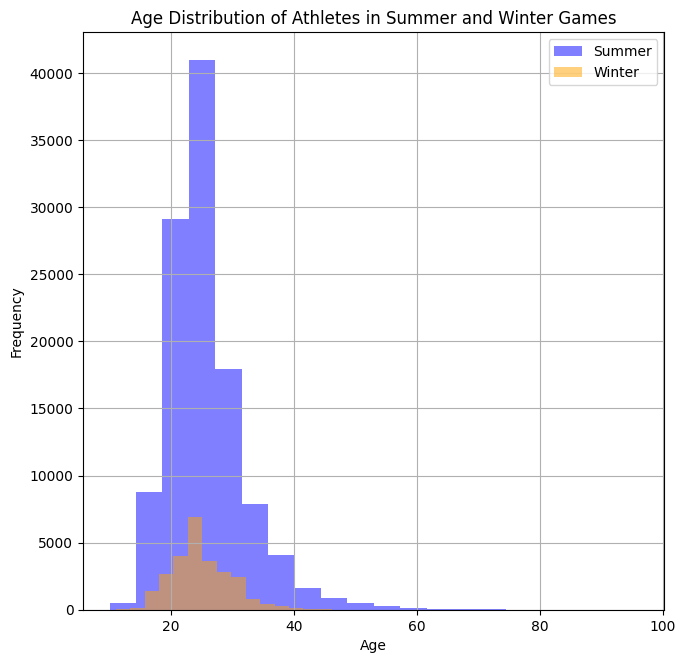

In [58]:
# Filter data for Summer and Winter Games separately
summer_data = df[df['Season'] == 'Summer']
winter_data = df[df['Season'] == 'Winter']

#Plotting graph
plt.figure(figsize=(7.5, 7.5))
plt.hist(summer_data['Age'], bins=20, alpha=0.5, label='Summer', color='blue')
plt.hist(winter_data['Age'], bins=20, alpha=0.5, label='Winter', color='orange')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Athletes in Summer and Winter Games')
plt.legend()
plt.grid(True)
plt.show()